In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

- K-Means 모델 생성 및 학습

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2022)

In [5]:
#학습결과
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [6]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([51, 65, 62]))

In [7]:
df = pd.DataFrame({
    'PC1':wine_pca[:,0], 'PC2':wine_pca[:,1], 'target':wine.target, 'cluster':kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,3.214917,-0.166992,0,2
51,2.858960,-0.745279,0,2
52,3.505604,-1.612734,0,2
53,2.224791,-1.875168,0,2
54,2.146988,-1.016752,0,2


In [10]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

- 군집결과 시각화

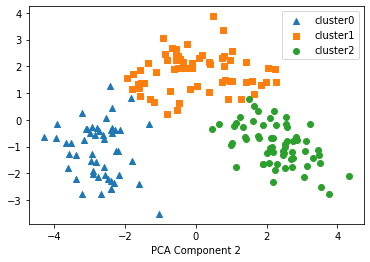

In [11]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[df.cluster == i]['PC1']
  y_data = df[df.cluster == i]['PC2']
  plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

plt.legend()
plt.xlabel('PCA Component 1'), plt.xlabel('PCA Component 2')
plt.show()

- 원본 데이터와 군집화된 데이터 비교

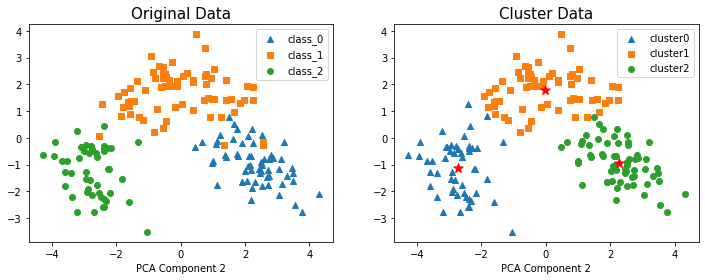

In [14]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
  plt.subplot(1,2,k+1)
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column] == i]['PC2']

    if k==0 : #target이면
      plt.title('Original Data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
    else :
      plt.title('Cluster Data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
      plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)

  plt.legend()
  plt.xlabel('PCA Component 1'), plt.xlabel('PCA Component 2')
plt.show()